In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

print('Observations')
print(observations.head())

print('Species')
print(species.head())

Observations
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
Species
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Auroch

In [3]:
df = observations.merge(species, on = 'scientific_name', how = 'left')
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()
# lots of nulls in conservation status, investigate!!

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24752
dtype: int64

<Axes: xlabel='conservation_status', ylabel='count'>

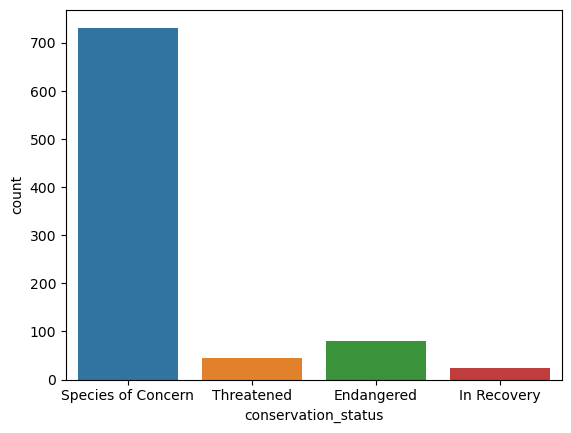

In [7]:
conservation_status = df['conservation_status'].reset_index()

sns.countplot(x = 'conservation_status', data = conservation_status)
# just missing lease concerned, can assume that the NaN represents least concerned
# Data missing not at random

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Least Concerned'),
  Text(1, 0, 'Species of Concern'),
  Text(2, 0, 'Threatened'),
  Text(3, 0, 'Endangered'),
  Text(4, 0, 'In Recovery')])

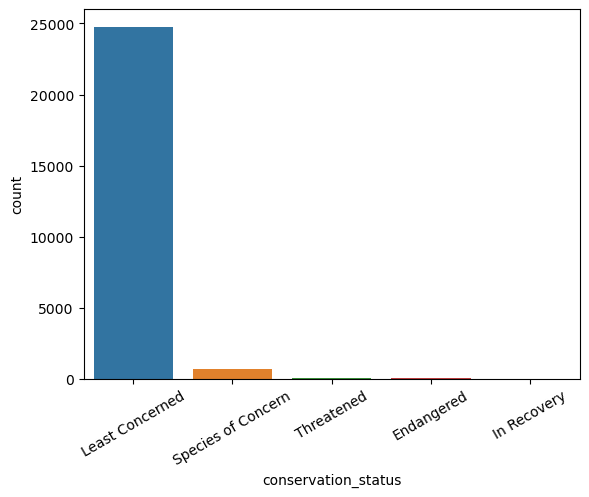

In [10]:
df['conservation_status'].fillna(value = 'Least Concerned', inplace = True)
conservation_status = df['conservation_status'].reset_index()

sns.countplot(x = 'conservation_status', data = conservation_status)
plt.xticks(rotation = 30)


In [12]:
observations_cons_status = df[['conservation_status','observations']].reset_index()

<Axes: xlabel='observations', ylabel='Count'>

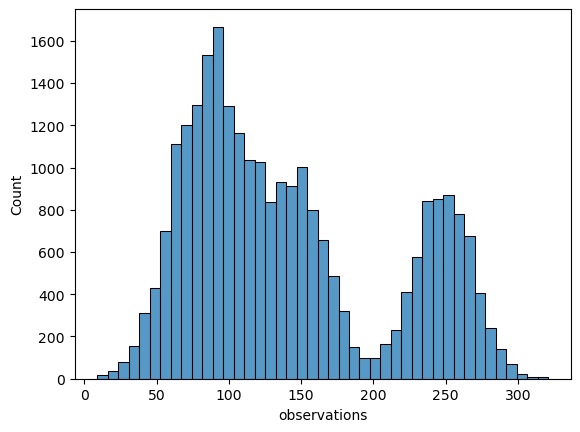

In [13]:
sns.histplot(data = observations_cons_status, x = 'observations')

<Axes: xlabel='observations', ylabel='Count'>

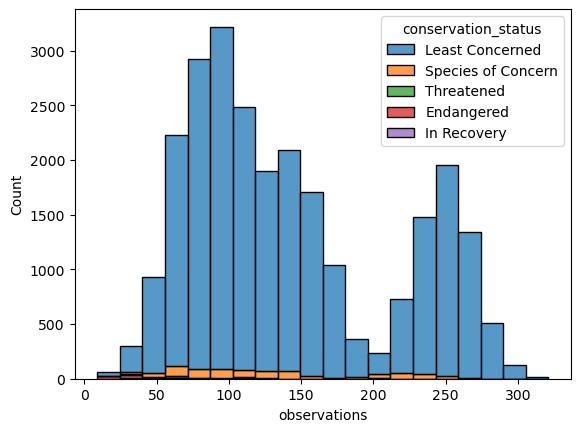

In [16]:
sns.histplot(data = observations_cons_status, x = 'observations', hue = 'conservation_status', multiple = 'stack', bins = 20)
# appears to be no visible correlation between conservation status and observations except for the endangered near the start of the histogram

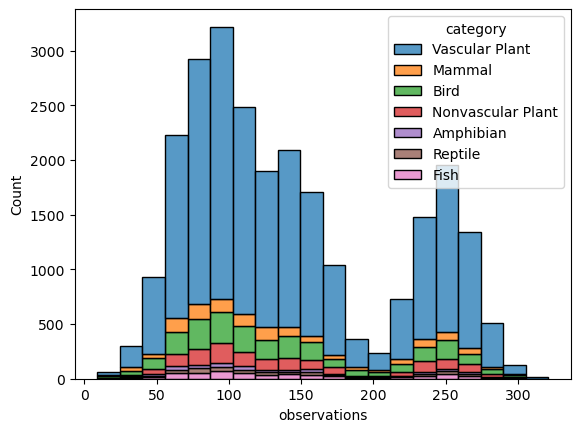

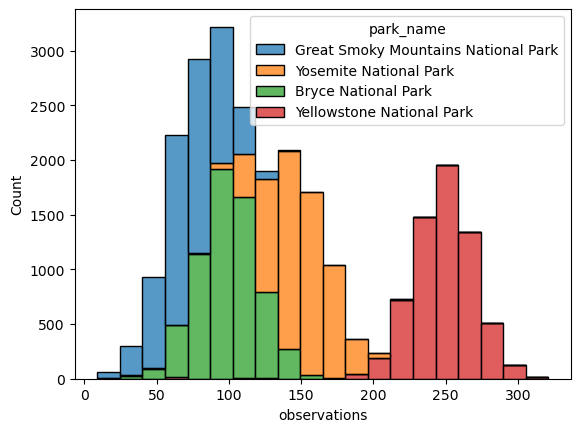

<Figure size 640x480 with 0 Axes>

In [20]:
# screw it lets just plot observations with all other variable types to see what is causing the bimodality
sns.histplot(data = df, x = 'observations', hue = 'category', multiple = 'stack', bins = 20)
plt.show()
plt.clf()

sns.histplot(data = df, x = 'observations', hue = 'park_name', multiple = 'stack', bins = 20)
plt.show()
plt.clf()

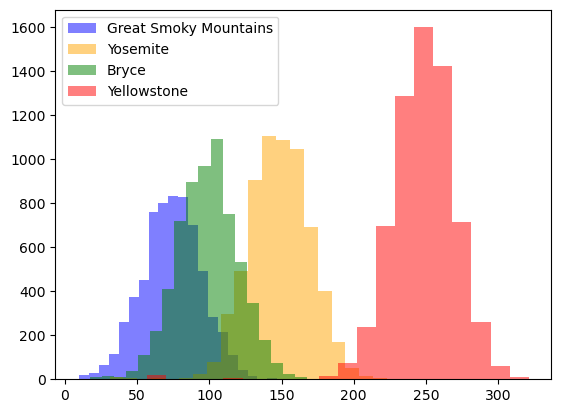

In [33]:
# looking at each individual park
plt.hist(df[df['park_name'] == 'Great Smoky Mountains National Park']['observations'], alpha=0.5, bins=20, color='blue', label = 'Great Smoky Mountains')
plt.hist(df[df['park_name'] == 'Yosemite National Park']['observations'], alpha=0.5, bins=20, color='orange', label = 'Yosemite')
plt.hist(df[df['park_name'] == 'Bryce National Park']['observations'], alpha=0.5, bins=20, color='green', label = 'Bryce')
plt.hist(df[df['park_name'] == 'Yellowstone National Park']['observations'], alpha=0.5, bins=20, color='red', label = 'Yellowstone')
plt.legend()
plt.show()